**Описание задания:**

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**


1. Получите и загрузите данные.

2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. 
Выберете и посчитайте метрику качества.

3. Снова загрузите полные данные.

4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

1. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

8. *Попробуйте математически преобразовать признак Age.

9. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

10. Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

# Libraries

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [334]:
SEED = 42

# Получите и загрузите данные.

In [335]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2022-04-19 18:03:40--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.12’

titanic.csv.12      100%[===================>]  58.89K  --.-KB/s    in 0.004s  

2022-04-19 18:03:41 (15.4 MB/s) - ‘titanic.csv.12’ saved [60302/60302]



Каждая строчка наборов данных содержит следующие поля:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [336]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
df.shape

(891, 12)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [339]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [340]:
df_drop_null = df._get_numeric_data()
df_drop_null.dropna(inplace=True)
df_drop_null.drop('PassengerId', inplace=True, axis=1)
df_drop_null

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [341]:
X = df_drop_null.drop('Survived', axis=1)
y = df_drop_null['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [342]:
log_reg = LogisticRegression(random_state=SEED).fit(X_train, y_train)
df_drop_null_score = f1_score(y_test, log_reg.predict(X_test))
df_drop_null_score

0.5473684210526316

# Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Удалим признаки:

 Cabin - почти полностью не заполнен

 Name, PassengerId - уникальное категориальное значение для каждого объекта

In [343]:
df.Ticket.nunique(), df.PassengerId.nunique(), df.Name.nunique()

(681, 891, 891)

In [344]:
df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


# Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Пропуски есть в признаках Age и Embarked

In [346]:
df[pd.isnull(df['Age'])], df[pd.isnull(df['Embarked'])]

(     Survived  Pclass     Sex  Age  SibSp  Parch      Ticket     Fare Embarked
 5           0       3    male  NaN      0      0      330877   8.4583        Q
 17          1       2    male  NaN      0      0      244373  13.0000        S
 19          1       3  female  NaN      0      0        2649   7.2250        C
 26          0       3    male  NaN      0      0        2631   7.2250        C
 28          1       3  female  NaN      0      0      330959   7.8792        Q
 ..        ...     ...     ...  ...    ...    ...         ...      ...      ...
 859         0       3    male  NaN      0      0        2629   7.2292        C
 863         0       3  female  NaN      8      2    CA. 2343  69.5500        S
 868         0       3    male  NaN      0      0      345777   9.5000        S
 878         0       3    male  NaN      0      0      349217   7.8958        S
 888         0       3  female  NaN      1      2  W./C. 6607  23.4500        S
 
 [177 rows x 9 columns],
      Survive

Пропуски не совпадают на объектов, следовательно объекты содержащие в этих двух признаках пропуски суммируем

Процент потерянных данных составит

In [347]:
(df[pd.isnull(df['Age'])].shape[0] + df[pd.isnull(df['Embarked'])].shape[0]) / df.shape[0] * 100

20.089786756453424

Заполним пропуски в Age случайным значением в диапазоне межквартильного размаха имеющихся значений Age

In [348]:
min_year, max_year = np.percentile(np.array(df['Age'].dropna()), q = [25, 75])
min_year, max_year = round(min_year), round(max_year)
print(min_year, max_year)
random.seed(SEED)
df['Age'] = df['Age'].apply(lambda x: random.randint(min_year, max_year) if pd.isnull(x) else x)

20 38


Заполним пропуски в Embarked значением моды признака

In [349]:
embarked_mode = df['Embarked'].mode().to_list()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [351]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Ticket', 'Embarked'], drop_first=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Проверьте данные на наличие выбросов. 

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

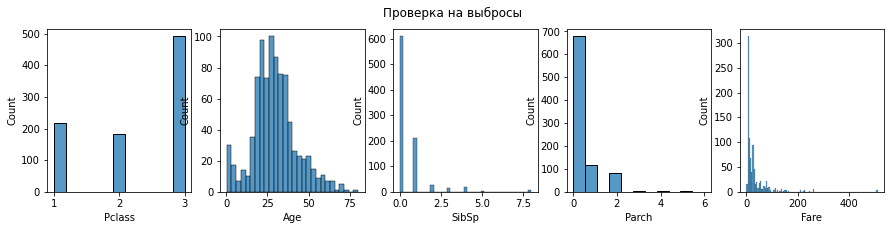

In [352]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle('Проверка на выбросы')

sns.histplot(ax=ax[0], x="Pclass", data=df)
sns.histplot(ax=ax[1], x="Age", data=df)
sns.histplot(ax=ax[2], x="SibSp", data=df)
sns.histplot(ax=ax[3], x="Parch", data=df)
sns.histplot(ax=ax[4], x="Fare", data=df)
plt.show()

По признаку Fare часть объектов похожи на выбросы. Однако, наблюдая форму распределения признакова, попробуем этот признак преобразовать логарифмом

In [353]:
df['Fare_log'] = np.log1p(df['Fare'])

Признаки Parch и SibSp также имеют схожее распределение однако диапазон значений значительно меньше чем в у признака Fare и видимого эффекта приведения к нормальному распределению данных мы не увидим. Оставим эти объекты похожие на выбросы в нашем датасете и оценим результат с ними.

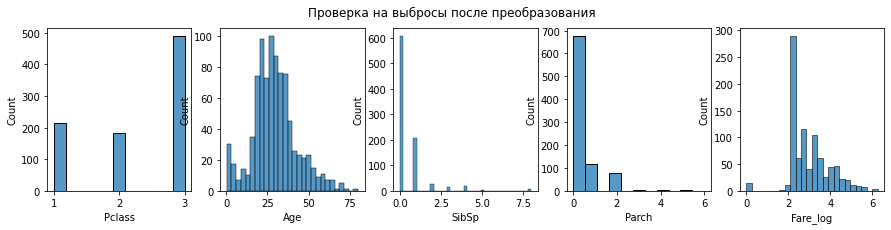

In [354]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle('Проверка на выбросы после преобразования')

sns.histplot(ax=ax[0], x="Pclass", data=df)
sns.histplot(ax=ax[1], x="Age", data=df)
sns.histplot(ax=ax[2], x="SibSp", data=df)
sns.histplot(ax=ax[3], x="Parch", data=df)
sns.histplot(ax=ax[4], x="Fare_log", data=df)
plt.show()

# Попробуйте математически преобразовать признак Age.

Подготовим датасет к обучению, для этого настроим пайплайн с предварительной стандартизацией данных.

In [355]:
pipe = Pipeline([('Scaler', StandardScaler()), 
                 ('LR', LogisticRegression(random_state=SEED))])

# Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [356]:
X = df.drop(['Survived', 'Fare'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('LR', LogisticRegression(random_state=42))])

In [357]:
df_score = f1_score(y_test, pipe.predict(X_test))
df_score

0.7669172932330828

# Выводы

а) Категориальные признаки были преобразованы с помощью методов ohe и проставления меток (label encoding). Причина - компьютер может работать только с численным типом данных, необходимо представить категориальные данные в виде чисел без потери смысла в самих данных.

б) После преобразований признаков метрика качества F1-score выросла и предсказательная способность алгоритма тоже.

в) Так или иначе данные на вход алгоритма преобразовывать необходимо. Будь то убирание пропусков и некорректных данных или же преобразование категориальных данных. Отдельное умение преобразовывать данные так, чтобы предсказательная способность алгоритма возрастала в этом и есть основная экспертиза DSа.

Что каксается работы с большими данными, то я думаю работа с информацией строится аналогичным образом и методы преобразования данных не изменяются - математика и здравый смысл везде одинаковые. Инструментарий будет другой и возможны физические ограничения, в силу рамеров данных на аналогичную обработку, но суть та же.